This code is baesd on https://www.tensorflow.org/alpha/tutorials/keras/basic_regression. Instead of tensorflow.keras, keras with mxnet backend is used.

In [ ]:
!pip install keras-mxnet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import mxnet as mx


Using MXNet backend


In [27]:
rawdata_2005 = pd.read_csv('data/inv_2005.csv')
rawdata_2005.head()

,Unnamed: 0,K_ART,Area,Kreis,WKA,Kaufwert,EMZ,Gemeinde,Preis,Verkauf,...,bio_06,bio_17,bio_18,NFK,PhysGru,slope,Bln_Ds,SQR,Fallow,Corn
0,0,710,53399.121378,12066,0,2032,29,12066196,0.215000,16,...,-5.5,110,181,51.230000,3.0,0.011118,53407,50.317997,NaN,NaN
1,1,341,114644.111372,12067,0,2266,30,12067237,0.290000,2,...,-5.7,94,172,116.559998,20.0,0.560899,43804,48.299999,NaN,NaN
2,2,480,3730.302887,12066,0,2032,29,12066052,0.178750,8,...,-5.0,114,191,0.000000,0.0,0.435643,68713,52.500000,NaN,NaN
3,3,412,3070.565000,12066,0,2032,29,12066320,0.250667,15,...,-5.2,110,189,151.552994,20.0,0.217099,70087,52.500000,NaN,NaN
4,4,723,3348.214174,12066,0,2032,29,12066320,0.250667,15,...,-5.2,110,189,151.552994,20.0,0.433522,70087,52.500000,NaN,NaN


In [32]:
rawdata_2005.isna().sum()


Unnamed: 0         0
K_ART              0
Area               0
Kreis              0
WKA                0
Kaufwert           0
EMZ                0
Gemeinde           0
Preis              0
Verkauf            0
Oeko               2
WKA_Dist           0
Windeigng          0
Biogas_Dis         0
Stdt_Ds            0
Bhf_Ds             0
Strsn_Ds           0
bio_05             0
bio_06             0
bio_17             0
bio_18             0
NFK                0
PhysGru            0
slope              0
Bln_Ds             0
SQR                0
Fallow        126944
Corn          152810
dtype: int64

In [38]:
rawdata_2005['Preis'].describe()

count    157764.000000
mean          0.228519
std           0.104914
min           0.000000
25%           0.182500
50%           0.222632
75%           0.280000
max           0.870000
Name: Preis, dtype: float64

In [4]:
rawdata_2005['K_ART'].count()

157764

In [34]:
rawdata_2005['Oeko'].unique()

array([ 0.,  1., nan])

In [5]:
(rawdata_2005['Oeko'].unique(), rawdata_2005['Oeko'].sum())

(array([ 0.,  1., nan]), 9764.0)

In [35]:
rawdata_2005.dtypes

Unnamed: 0      int64
K_ART           int64
Area          float64
Kreis           int64
WKA             int64
Kaufwert        int64
EMZ             int64
Gemeinde        int64
Preis         float64
Verkauf         int64
Oeko          float64
WKA_Dist      float64
Windeigng       int64
Biogas_Dis      int64
Stdt_Ds         int64
Bhf_Ds          int64
Strsn_Ds        int64
bio_05        float64
bio_06        float64
bio_17          int64
bio_18          int64
NFK           float64
PhysGru       float64
slope         float64
Bln_Ds          int64
SQR           float64
Fallow        float64
Corn          float64
dtype: object

In [37]:
datasset_2005 = rawdata_2005.drop(columns=['Fallow', 'Corn', 'Unnamed: 0']).copy()
datasset_2005.astype('float32')
datasset_2005.head()


,K_ART,Area,Kreis,WKA,Kaufwert,EMZ,Gemeinde,Preis,Verkauf,Oeko,...,Strsn_Ds,bio_05,bio_06,bio_17,bio_18,NFK,PhysGru,slope,Bln_Ds,SQR
0,710,53399.121378,12066,0,2032,29,12066196,0.215000,16,0.0,...,1023,22.299999,-5.5,110,181,51.230000,3.0,0.011118,53407,50.317997
1,341,114644.111372,12067,0,2266,30,12067237,0.290000,2,1.0,...,143,21.900000,-5.7,94,172,116.559998,20.0,0.560899,43804,48.299999
2,480,3730.302887,12066,0,2032,29,12066052,0.178750,8,0.0,...,114,22.000000,-5.0,114,191,0.000000,0.0,0.435643,68713,52.500000
3,412,3070.565000,12066,0,2032,29,12066320,0.250667,15,0.0,...,311,22.200001,-5.2,110,189,151.552994,20.0,0.217099,70087,52.500000
4,723,3348.214174,12066,0,2032,29,12066320,0.250667,15,0.0,...,260,22.200001,-5.2,110,189,151.552994,20.0,0.433522,70087,52.500000


In [7]:
print(datasset_2005['K_ART'].count())
datasset_2005 = datasset_2005.dropna()
print(datasset_2005['K_ART'].count())

157764
157762


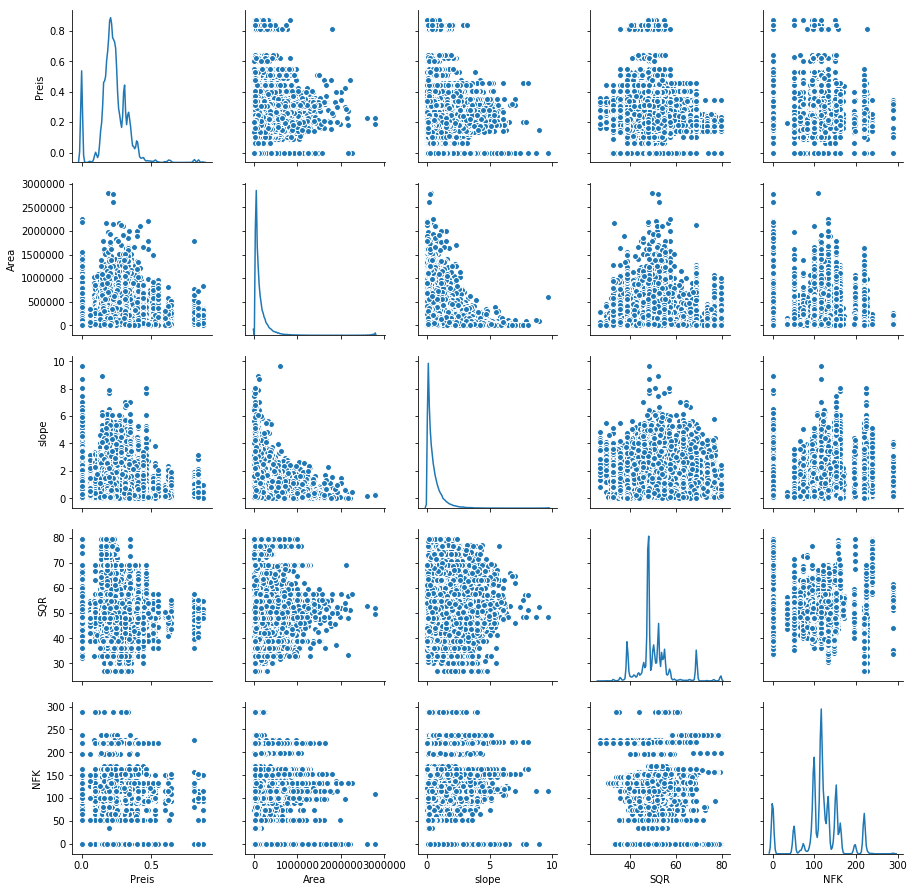

In [8]:
sns.pairplot(datasset_2005[['Preis', 'Area', 'slope', 'SQR', 'NFK']], diag_kind='kde')

In [46]:
for h in list(datasset_2005.columns):
    print(h)

len(datasset_2005['K_ART'].unique())

K_ART
Area
Kreis
WKA
Kaufwert
EMZ
Gemeinde
Preis
Verkauf
Oeko
WKA_Dist
Windeigng
Biogas_Dis
Stdt_Ds
Bhf_Ds
Strsn_Ds
bio_05
bio_06
bio_17
bio_18
NFK
PhysGru
slope
Bln_Ds
SQR


116

In [9]:
header = list(datasset_2005.columns)
for head in header:
    print(head, len(datasset_2005[head].unique()))
    
 

K_ART 116
Area 157696
Kreis 19
WKA 13
Kaufwert 19
EMZ 8
Gemeinde 414
Preis 211
Verkauf 32
Oeko 2
WKA_Dist 157018
Windeigng 2
Biogas_Dis 29833
Stdt_Ds 45165
Bhf_Ds 14807
Strsn_Ds 2940
bio_05 37
bio_06 24
bio_17 56
bio_18 78
NFK 59
PhysGru 13
slope 127349
Bln_Ds 67966
SQR 30255


In [62]:
categoricals = ['Kreis', 'WKA', 'Kaufwert', 'EMZ', 'Windeigng']

In [63]:
def convert_categorical_to_one_hot(df, header):
    dataframe = df.pop(header)
    head_values = list(dataframe.unique())
    for v in head_values:
        df[header+'_'+str(v)] = (dataframe == v) * 1.0
    dataframe = dataframe
    return df

In [64]:
for categorical in categoricals:
    datasset_2005 = convert_categorical_to_one_hot(datasset_2005, categorical)

In [65]:
datasset_2005['Kreis_12066'].unique()

array([1., 0.])

In [13]:
datasset_2005.describe().T

,count,mean,std,min,25%,50%,75%,max
K_ART,157762.0,3.578899e+02,194.658372,0.000000e+00,1.430000e+02,4.510000e+02,4.520000e+02,9.990000e+02
Area,157762.0,8.397533e+04,133280.181852,8.912300e-04,1.033487e+04,3.307286e+04,9.996863e+04,2.798862e+06
Gemeinde,157762.0,1.206101e+07,78037.151895,1.100000e+07,1.206319e+07,1.206741e+07,1.207024e+07,1.207364e+07
Preis,157762.0,2.285192e-01,0.104914,0.000000e+00,1.825000e-01,2.226316e-01,2.800000e-01,8.700000e-01
Verkauf,157762.0,9.339689e+00,10.011210,0.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,7.600000e+01
Oeko,157762.0,6.189070e-02,0.240958,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
WKA_Dist,157762.0,6.410979e+03,4870.235820,0.000000e+00,2.692484e+03,5.264978e+03,9.113706e+03,3.314450e+04
Biogas_Dis,157762.0,1.329419e+04,7073.910660,0.000000e+00,7.755000e+03,1.247000e+04,1.825400e+04,4.014400e+04
Stdt_Ds,157762.0,1.877987e+04,12275.856928,0.000000e+00,9.010000e+03,1.663700e+04,2.668575e+04,5.966200e+04
Bhf_Ds,157762.0,4.568723e+03,3067.754534,8.000000e+00,2.293000e+03,3.936000e+03,6.058000e+03,2.118600e+04


In [14]:
train_dataset_2005 = datasset_2005.sample(frac=.8, random_state=42)
train_dataset_2005_label = train_dataset_2005.pop('Preis')
test_dataset_2005 = datasset_2005.drop(train_dataset_2005.index)
test_dataset_2005_label = test_dataset_2005.pop('Preis')
(train_dataset_2005.shape, train_dataset_2005_label.shape, test_dataset_2005.shape, test_dataset_2005_label.shape)

((126210, 80), (126210,), (31552, 80), (31552,))

In [15]:
train_stats = train_dataset_2005.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
K_ART,126210.0,3.578079e+02,195.005960,0.000000e+00,1.430000e+02,4.510000e+02,4.520000e+02,9.990000e+02
Area,126210.0,8.411967e+04,133958.644735,8.912300e-04,1.035916e+04,3.304745e+04,9.986954e+04,2.785679e+06
Gemeinde,126210.0,1.206092e+07,78617.331323,1.100000e+07,1.206319e+07,1.206741e+07,1.207024e+07,1.207364e+07
Verkauf,126210.0,9.327098e+00,10.009571,0.000000e+00,3.000000e+00,7.000000e+00,1.300000e+01,7.600000e+01
Oeko,126210.0,6.240393e-02,0.241889,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
WKA_Dist,126210.0,6.408433e+03,4868.012597,0.000000e+00,2.686748e+03,5.261158e+03,9.115837e+03,3.314450e+04
Biogas_Dis,126210.0,1.329275e+04,7067.502556,0.000000e+00,7.757000e+03,1.247600e+04,1.826200e+04,4.014400e+04
Stdt_Ds,126210.0,1.875494e+04,12263.171375,0.000000e+00,8.989000e+03,1.662150e+04,2.664500e+04,5.966200e+04
Bhf_Ds,126210.0,4.568442e+03,3062.398420,8.000000e+00,2.296000e+03,3.939000e+03,6.060750e+03,2.118600e+04
Strsn_Ds,126210.0,5.478155e+02,494.624429,0.000000e+00,1.760000e+02,3.950000e+02,7.760000e+02,3.745000e+03


In [16]:
def normalize_dataset(x):
    return (x - train_stats['mean']) / (train_stats['std'])
train_dataset_2005 = normalize_dataset(train_dataset_2005)
test_dataset_2005 = normalize_dataset(test_dataset_2005)

In [17]:
train_dataset_2005.describe().T

,count,mean,std,min,25%,50%,75%,max
K_ART,126210.0,-1.303274e-15,1.0,-1.834856,-1.101545,0.477894,0.483022,3.288064
Area,126210.0,2.297995e-15,1.0,-0.627953,-0.550622,-0.381254,0.117573,20.167111
Gemeinde,126210.0,7.509736e-15,1.0,-13.494727,0.028869,0.082597,0.118506,0.161868
Verkauf,126210.0,1.834503e-16,1.0,-0.931818,-0.632105,-0.232487,0.366939,6.660915
Oeko,126210.0,1.659158e-15,1.0,-0.257986,-0.257986,-0.257986,-0.257986,3.876147
WKA_Dist,126210.0,-1.417159e-14,1.0,-1.316437,-0.764518,-0.235676,0.556162,5.492194
Biogas_Dis,126210.0,9.086361e-17,1.0,-1.880827,-0.783269,-0.115565,0.703112,3.799255
Stdt_Ds,126210.0,9.606737e-17,1.0,-1.529371,-0.796363,-0.173971,0.643395,3.335765
Bhf_Ds,126210.0,4.489098e-17,1.0,-1.489173,-0.742047,-0.205539,0.487300,5.426321
Strsn_Ds,126210.0,3.029384e-17,1.0,-1.107538,-0.751713,-0.308953,0.461329,6.463863


In [18]:
import keras.layers as layers
import keras

Using MXNet backend


In [66]:
train_dataset_2005.keys()

Index(['K_ART', 'Area', 'Gemeinde', 'Verkauf', 'Oeko', 'WKA_Dist',
       'Biogas_Dis', 'Stdt_Ds', 'Bhf_Ds', 'Strsn_Ds', 'bio_05', 'bio_06',
       'bio_17', 'bio_18', 'NFK', 'PhysGru', 'slope', 'Bln_Ds', 'SQR',
       'Kreis_12066', 'Kreis_12067', 'Kreis_12062', 'Kreis_12071',
       'Kreis_12064', 'Kreis_12061', 'Kreis_12063', 'Kreis_12072',
       'Kreis_12052', 'Kreis_11000', 'Kreis_12065', 'Kreis_12068',
       'Kreis_12073', 'Kreis_12054', 'Kreis_12070', 'Kreis_12069',
       'Kreis_12060', 'Kreis_12053', 'Kreis_12051', 'WKA_0', 'WKA_1', 'WKA_2',
       'WKA_3', 'WKA_4', 'WKA_5', 'WKA_9', 'WKA_6', 'WKA_8', 'WKA_7', 'WKA_10',
       'WKA_13', 'WKA_11', 'Kaufwert_2032', 'Kaufwert_2266', 'Kaufwert_2070',
       'Kaufwert_2679', 'Kaufwert_2844', 'Kaufwert_2214', 'Kaufwert_2795',
       'Kaufwert_2105', 'Kaufwert_1564', 'Kaufwert_0', 'Kaufwert_3133',
       'Kaufwert_2483', 'Kaufwert_3590', 'Kaufwert_3401', 'Kaufwert_2506',
       'Kaufwert_2233', 'Kaufwert_2680', 'Kaufwert_3559', 'Ka

In [19]:
model = keras.Sequential()
model.add(layers.Dense(units=32, activation='relu', input_shape=[len(train_dataset_2005.keys())]))
#model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1))

optimizer = keras.optimizers.RMSprop(lr=.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2592      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [21]:
epochs = 100
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_dataset_2005, 
                    train_dataset_2005_label, 
                    epochs=epochs, 
                    validation_split=0.2, 
                    callbacks=[early_stop])



Train on 100968 samples, validate on 25242 samples
Epoch 1/100
  2624/100968 [..............................] - ETA: 6s - loss: 0.4646 - mean_squared_error: 0.4646 - mean_absolute_error: 0.4498

/home/ubuntu/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.03125). Is this intended?
  force_init=force_init)


100968/100968 [==============================] - 8s 81us/step - loss: 0.0574 - mean_squared_error: 0.0574 - mean_absolute_error: 0.0841 - val_loss: 0.0485 - val_mean_squared_error: 0.0485 - val_mean_absolute_error: 0.0637
Epoch 2/100
100968/100968 [==============================] - 8s 80us/step - loss: 0.0120 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0534 - val_loss: 0.0294 - val_mean_squared_error: 0.0294 - val_mean_absolute_error: 0.0563
Epoch 3/100
100968/100968 [==============================] - 8s 78us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0486 - val_loss: 0.0204 - val_mean_squared_error: 0.0204 - val_mean_absolute_error: 0.0493
Epoch 4/100
100968/100968 [==============================] - 8s 78us/step - loss: 0.0059 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0458 - val_loss: 0.0111 - val_mean_squared_error: 0.0111 - val_mean_absolute_error: 0.0454
Epoch 5/100
100968/100968 [==============================] - 8s 76us/step - 

In [22]:
training_states = pd.DataFrame(history.history).describe()
mae_ylim = training_states['val_mean_absolute_error']['max'] * 2
mse_ylim = training_states['val_mean_squared_error']['max'] * 2
(mae_ylim, mse_ylim)

(0.12734264487670877, 0.09693580733920776)

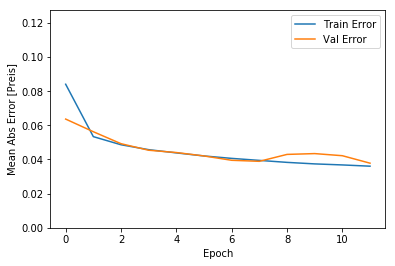

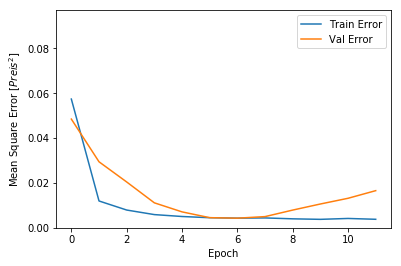

In [23]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Preis]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,mae_ylim])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Preis^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,mse_ylim])
  plt.legend()
  plt.show()


plot_history(history)

In [24]:
loss, mae, mse = model.evaluate(test_dataset_2005, test_dataset_2005_label, verbose=0)

(loss, mae, mse)

(0.01534052283011833, 0.01534052283011833, 0.037915782051814555)

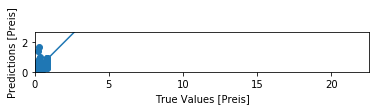

In [25]:
import numpy as np

test_predictions = model.predict(test_dataset_2005).flatten()

plt.scatter(test_dataset_2005_label, test_predictions)
plt.xlabel('True Values [Preis]')
plt.ylabel('Predictions [Preis]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])